# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

## H<sub>2</sub>

In [3]:
bond_lengths = np.linspace(0.2,2.6,15)

In [4]:
#Run FCI
FCI_PES = obtain_PES('h2', bond_lengths, basis, method='fci')

E = 0.15748213365503494 Eh
E = -0.8488991062024307 Eh
E = -1.088228184406917 Eh
E = -1.1369289594005694 Eh
E = -1.122957052798233 Eh
E = -1.0887645364963472 Eh
E = -1.050442037218747 Eh
E = -1.0154681711140932 Eh
E = -0.9873930555210572 Eh
E = -0.9670259116093078 Eh
E = -0.9534242388722525 Eh
E = -0.9449089870950522 Eh
E = -0.9398197912188271 Eh
E = -0.9368706035283363 Eh
E = -0.9351960308386074 Eh


In [5]:
#Run HF
HF_PES = obtain_PES('h2', bond_lengths, basis,  method='hf')

E = 0.16412595411336117 Eh
E = -0.8397057843499895 Eh
E = -1.0748879317191191 Eh
E = -1.1175258568986786 Eh
E = -1.0951595815644826 Eh
E = -1.049561784275208 Eh
E = -0.9960202460350617 Eh
E = -0.9415474099692247 Eh
E = -0.8899751417971353 Eh
E = -0.8432718025417775 Eh
E = -0.8022429584004123 Eh
E = -0.7669825247359986 Eh
E = -0.7371545448988277 Eh
E = -0.7121961606082434 Eh
E = -0.691470051262483 Eh


In [6]:
#Run CCSD
CCSD_PES = obtain_PES('h2', bond_lengths, basis,  method='ccsd')

E = 0.1574841205643646 Eh
E = -0.8488985094851168 Eh
E = -1.088231017430786 Eh
E = -1.1369333351418642 Eh
E = -1.1229593878059771 Eh
E = -1.088760690592053 Eh
E = -1.050426089327125 Eh
E = -1.015441558375805 Eh
E = -0.9873692849076258 Eh
E = -0.9670168314563384 Eh
E = -0.953430155825735 Eh
E = -0.9449225613845055 Eh
E = -0.9398332746700121 Eh
E = -0.9368793989542723 Eh
E = -0.935198926536707 Eh


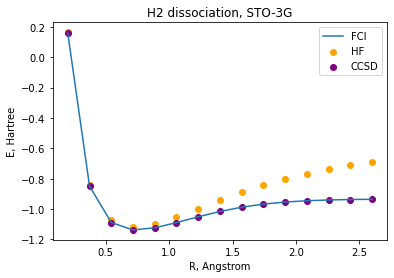

In [7]:
#Plot H2 PESs

plt.title('H2 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

<img src="figs/testimage.png">

## H<sub>2</sub>O symmetric O-H dissociation

In [8]:
bond_lengths = np.linspace(0.5,2.3,15)

In [9]:
#Run FCI
FCI_PES = obtain_PES('h2o', bond_lengths, basis, method='fci')

E = -73.14278405998363 Eh
E = -74.32891986974292 Eh
E = -74.80293568658178 Eh
E = -74.97710169964022 Eh
E = -75.01842170965485 Eh
E = -74.99984539662213 Eh
E = -74.95705989386818 Eh
E = -74.90815616884551 Eh
E = -74.8619906558871 Eh
E = -74.82289633489701 Eh
E = -74.79277210286915 Eh
E = -74.77161515186945 Eh
E = -74.75793070275864 Eh
E = -74.74957661755482 Eh
E = -74.74461281285477 Eh


In [10]:
#Run HF
HF_PES = obtain_PES('h2o', bond_lengths, basis,  method='hf')

E = -73.12948161321033 Eh
E = -74.30886057368586 Eh
E = -74.77414693446619 Eh
E = -74.93652000301377 Eh
E = -74.96177233995277 Eh
E = -74.92178843720764 Eh
E = -74.85159862175847 Eh
E = -74.76907276939039 Eh
E = -74.68314420902544 Eh
E = -74.59858705268566 Eh
E = -74.51846805420067 Eh
E = -74.44494384742792 Eh
E = -74.3784079776272 Eh
E = -74.32091934915539 Eh
E = -74.27095418407959 Eh


In [11]:
#Run CCSD
CCSD_PES = obtain_PES('h2o', bond_lengths, basis,  method='ccsd')

E = -73.14276363918698 Eh
E = -74.32888671754152 Eh
E = -74.80287978581747 Eh
E = -74.97700866325395 Eh
E = -75.01826461963304 Eh
E = -74.99956350788962 Eh
E = -74.95655073552668 Eh
E = -74.90734075017681 Eh
E = -74.86104256063723 Eh
E = -74.82275052892096 Eh
E = -74.79580249819021 Eh
E = -74.78105738717342 Eh
E = -74.77499958957902 Eh
E = -74.77855844408172 Eh
E = -74.78137147434411 Eh


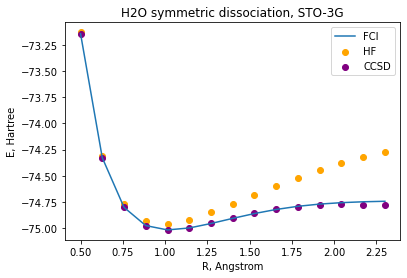

In [12]:
#Plot H2O PESs

plt.title('H2O symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()